In [44]:

import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    #fig, ax = plt.subplots()
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    g.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [45]:
figdir = '../figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [46]:
resultsdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_eigenvector_centrality_10_mexican_hat_5/level_10'

## find maximum level computed for optimization

In [51]:
max_level = int(os.path.basename(os.path.splitext(resultsdir)[0]).split('_')[1])

## compile to one dataframe

In [48]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [49]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

## create column with max level computed

In [52]:
full_data['max_level'] = max_level - full_data.isnull().sum(axis=1)

In [54]:
full_data.head()

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,rank,iteration,cond,max_level
0,0,0.323333,0.035767,0,10,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987244,0,intact,0
1,0,0.350000,0.039444,0,10,0.824257,0.175743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987711,0,intact,1
2,0,0.356667,0.039433,0,10,0.819030,0.159728,NaN,0.021242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.987733,0,intact,2
3,0,0.343333,0.037878,0,10,0.776313,0.152645,NaN,0.035197,0.035845,NaN,NaN,NaN,NaN,NaN,NaN,0.987933,0,intact,3
4,0,0.213333,0.091344,0,10,0.161911,0.287369,NaN,0.209105,0.238255,0.10336,NaN,NaN,NaN,NaN,NaN,0.979722,0,intact,4


In [87]:
melted_temp_df = pd.DataFrame()
melted_temp_df['max_level'] = full_data['max_level']
melted_temp_df['accuracy'] = full_data['accuracy']
melted_temp_df['cond'] = full_data['cond']
melted_temp_df['1 - error'] = 1-full_data['error']

In [88]:
melted_temp_df.head()

,max_level,accuracy,cond,1 - error
0,0,0.323333,intact,0.964233
1,1,0.350000,intact,0.960556
2,2,0.356667,intact,0.960567
3,3,0.343333,intact,0.962122
4,4,0.213333,intact,0.908656


In [91]:
plt.clf()
grouped_barplot(melted_temp_df, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.3, title='optimizing weights')

NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


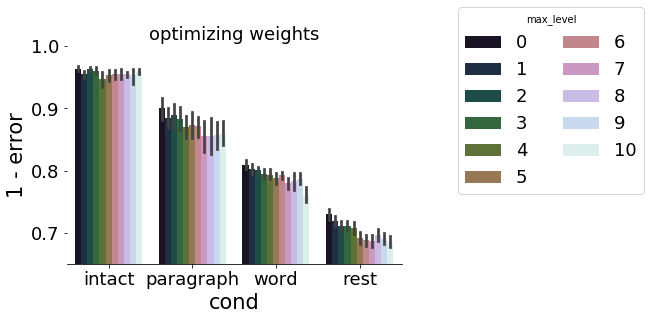

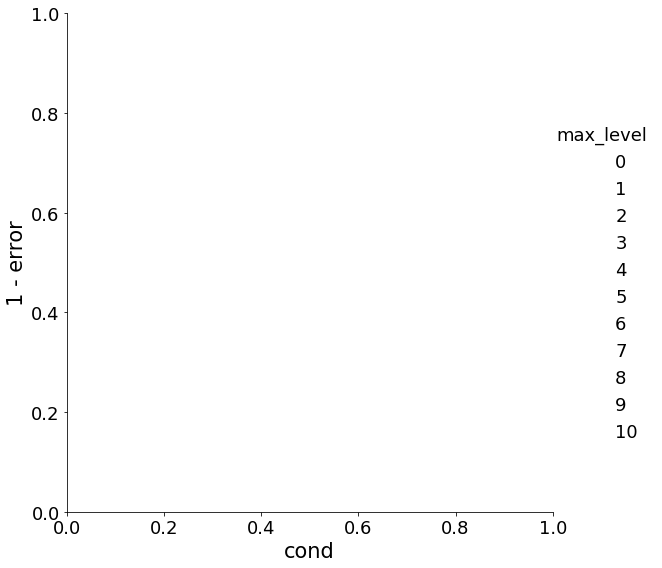

In [89]:
grouped_barplot(melted_temp_df, 'cond', '1 - error', 'max_level', ymin=.65, ymax=1, title='optimizing weights')